In [ ]:
# Import necessary libraries
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



In [ ]:
# Load and preprocess the data
with open('Sarcasm_Headlines_Dataset.json') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df = df[['headline', 'is_sarcastic']]



FileNotFoundError: [Errno 2] No such file or directory: 'Sarcasm_Headlines_Dataset.json'

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['headline'])
sequences = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(sequences, maxlen=30)  # maxlen chosen to fit most headlines
y = df['is_sarcastic'].values



In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define function to build and evaluate models
def build_and_evaluate(model):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=3, batch_size=64, verbose=1)

    # Evaluate on test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

    # Plot accuracy and loss
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
     plt.plot(history.history['val_accuracy'], label='val accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

IndentationError: unexpected indent (<ipython-input-18-8f1cde75d4df>, line 17)

In [ ]:
##################
def build_and_evaluate(model):
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=3, batch_size=64, verbose=1)

    # Evaluate the model on the test set using Keras' evaluate method
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Silent mode (verbose=0)
    print(f'Test Accuracy (via evaluate): {test_accuracy}')

    # Predict on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()  # Ensure it's 1D

    # Flatten y_test if necessary (ensure it's also 1D)
    y_test = y_test.flatten()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy (manual): {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
# RNN Model
print("RNN Model:")
rnn_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
build_and_evaluate(rnn_model)

RNN Model:
Epoch 1/3
322/322 [==============================] - 7s 16ms/step - loss: 0.4353 - accuracy: 0.7845 - val_loss: 0.3614 - val_accuracy: 0.8384
Epoch 2/3
322/322 [==============================] - 5s 14ms/step - loss: 0.1386 - accuracy: 0.9507 - val_loss: 0.4024 - val_accuracy: 0.8345
Epoch 3/3
322/322 [==============================] - 5s 14ms/step - loss: 0.0274 - accuracy: 0.9923 - val_loss: 0.4817 - val_accuracy: 0.8293


UnboundLocalError: local variable 'y_test' referenced before assignment

LSTM Model:
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


322/322 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.7252 - loss: 0.5209 - val_accuracy: 0.8424 - val_loss: 0.3480
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9304 - loss: 0.1870 - val_accuracy: 0.8498 - val_loss: 0.3754
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9717 - loss: 0.0845 - val_accuracy: 0.8441 - val_loss: 0.4436
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9878 - loss: 0.0408 - val_accuracy: 0.8354 - val_loss: 0.5229
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9921 - loss: 0.0253 - val_accuracy: 0.8341 - val_loss: 0.6736
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9966 - loss: 0.0119 - val_accuracy: 0.8253 - val_loss: 0.7527
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.8319 - val_loss: 0.8108
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9986 - loss: 0.0068 - val_accurac

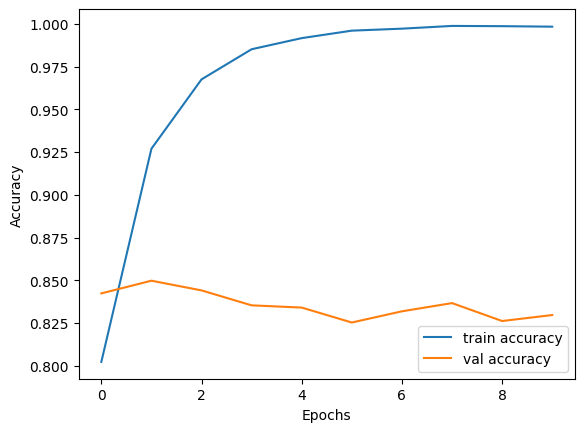

In [ ]:
# LSTM Model
print("LSTM Model:")
lstm_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
build_and_evaluate(lstm_model)

BiLSTM Model:
Epoch 1/10
322/322 [==============================] - 14s 33ms/step - loss: 0.4234 - accuracy: 0.7907 - val_loss: 0.3520 - val_accuracy: 0.8489
Epoch 2/10
322/322 [==============================] - 10s 30ms/step - loss: 0.1823 - accuracy: 0.9298 - val_loss: 0.3811 - val_accuracy: 0.8493
Epoch 3/10
322/322 [==============================] - 10s 31ms/step - loss: 0.0816 - accuracy: 0.9726 - val_loss: 0.5039 - val_accuracy: 0.8306
Epoch 4/10
322/322 [==============================] - 10s 30ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.6014 - val_accuracy: 0.8410
Epoch 5/10
322/322 [==============================] - 10s 31ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.6929 - val_accuracy: 0.8323
Epoch 6/10
322/322 [==============================] - 10s 30ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.9041 - val_accuracy: 0.8336
Epoch 7/10
322/322 [==============================] - 10s 30ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.7800 -

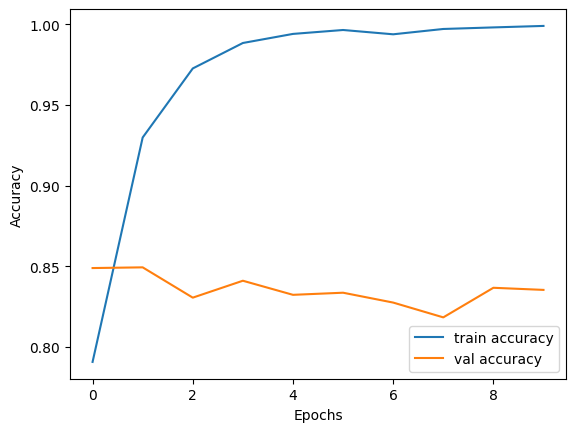

In [ ]:
# BiLSTM Model
print("BiLSTM Model:")
bilstm_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 64, input_length=30),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
build_and_evaluate(bilstm_model)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Function to encode texts for BERT
def encode_texts(texts):
    return bert_tokenizer(
        texts,
        padding=True,
        truncation=True,
        return_tensors="tf",
        max_length=30
    )

# First split into train+val and test
X_temp_indices, X_test_indices, y_temp, y_test = train_test_split(
    df.index,
    df['is_sarcastic'],
    test_size=0.2,
    random_state=42
)

# Then split train+val into train and validation
X_train_indices, X_val_indices, y_train, y_val = train_test_split(
    X_temp_indices,
    y_temp,
    test_size=0.1,  # 10% of the training data for validation
    random_state=42
)

# Convert indices to lists of headlines and encode for BERT
train_encodings = encode_texts(df.loc[X_train_indices, 'headline'].tolist())
val_encodings = encode_texts(df.loc[X_val_indices, 'headline'].tolist())
test_encodings = encode_texts(df.loc[X_test_indices, 'headline'].tolist())

# Convert labels to appropriate format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Create tf.data.Dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    y_train
))
train_dataset = train_dataset.shuffle(1000).batch(32)

# Create tf.data.Dataset for validation
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    y_val
))
val_dataset = val_dataset.batch(32)

# Create tf.data.Dataset for testing
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    },
    y_test
))
test_dataset = test_dataset.batch(32)

# Compile and train BERT model
print("Training BERT Model:")
bert_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with separate validation dataset
bert_history = bert_model.fit(
    train_dataset,
    validation_data=val_dataset,  # Use validation_data instead of validation_split
    epochs=3,
    verbose=1
)

# Evaluate BERT
predictions = bert_model.predict(test_dataset)
y_pred_bert = np.argmax(predictions.logits, axis=1)
y_test_original = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy_bert = accuracy_score(y_test_original, y_pred_bert)
precision_bert = precision_score(y_test_original, y_pred_bert)
recall_bert = recall_score(y_test_original, y_pred_bert)
f1_bert = f1_score(y_test_original, y_pred_bert)

print(f'\nBERT Metrics:')
print(f'Accuracy: {accuracy_bert:.4f}')
print(f'Precision: {precision_bert:.4f}')
print(f'Recall: {recall_bert:.4f}')
print(f'F1 Score: {f1_bert:.4f}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training BERT Model:
Epoch 1/3
644/644 [==============================] - 871s 1s/step - loss: 0.7426 - accuracy: 0.4949 - val_loss: 0.7022 - val_accuracy: 0.4873
Epoch 2/3
644/644 [==============================] - 808s 1s/step - loss: 0.6930 - accuracy: 0.4824 - val_loss: 0.6947 - val_accuracy: 0.4873
Epoch 3/3
179/179 [==============================] - 71s 378ms/step

BERT Metrics:
Accuracy: 0.4768
Precision: 0.4768
Recall: 1.0000
F1 Score: 0.6457




```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, TFBertForSequenceClassification

# Preprocessing function
def preprocess_text(text):
    """
    Clean and standardize text data
    """
    # Convert to lowercase
    text = str(text).lower()

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Dataset preparation and analysis function
def prepare_dataset(df):
    """
    Prepare and analyze the dataset
    """
    # Preprocessing
    df['processed_headline'] = df['headline'].apply(preprocess_text)

    # Shuffle the entire dataset
    df = shuffle(df, random_state=42)

    # Detailed dataset analysis
    print("Dataset Characteristics:")
    print("-" * 30)
    print("Total Samples:", len(df))

    # Class distribution
    class_dist = df['is_sarcastic'].value_counts(normalize=True)
    print("\nClass Distribution:")
    for label, proportion in class_dist.items():
        print(f"Class {label}: {proportion:.2%}")

    # Sample headlines from each class
    print("\nSample Sarcastic Headlines:")
    print(df[df['is_sarcastic'] == 1]['headline'].sample(min(5, sum(df['is_sarcastic'] == 1))).tolist())

    print("\nSample Non-Sarcastic Headlines:")
    print(df[df['is_sarcastic'] == 0]['headline'].sample(min(5, sum(df['is_sarcastic'] == 0))).tolist())

    return df

# Balancing dataset (if needed)
def balance_dataset(df):
    """
    Balance dataset using oversampling
    """
    # Separate majority and minority classes
    df_majority = df[df['is_sarcastic'] == 0]
    df_minority = df[df['is_sarcastic'] == 1]

    # Upsample minority class
    from sklearn.utils import resample
    df_minority_upsampled = resample(
        df_minority,
        replace=True,     # sample with replacement
        n_samples=len(df_majority),    # to match majority class
        random_state=42
    )

    # Combine majority class with upsampled minority class
    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    # Shuffle the balanced dataset
    return shuffle(df_balanced, random_state=42)

# BERT Model Training Function
def train_bert_model(df):
    """
    Train BERT model for sarcasm detection
    """
    # Prepare dataset
    df = prepare_dataset(df)

    # Optional: Balance dataset if needed
    # df = balance_dataset(df)

    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        df['processed_headline'],
        df['is_sarcastic'],
        test_size=0.2,
        stratify=df['is_sarcastic'],  # Ensure balanced split
        random_state=42
    )

    # Initialize tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=2
    )

    # Tokenization function
    def tokenize_texts(texts):
        return tokenizer(
            texts.tolist(),
            padding=True,
            truncation=True,
            return_tensors='tf',
            max_length=128
        )

    # Prepare datasets
    train_encodings = tokenize_texts(X_train)
    test_encodings = tokenize_texts(X_test)

    # Create TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': train_encodings['input_ids'],
            'attention_mask': train_encodings['attention_mask']
        },
        tf.keras.utils.to_categorical(y_train, num_classes=2)
    )).shuffle(100).batch(16)

    test_dataset = tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': test_encodings['input_ids'],
            'attention_mask': test_encodings['attention_mask']
        },
        tf.keras.utils.to_categorical(y_test, num_classes=2)
    )).batch(16)

    # Learning rate scheduling
    initial_learning_rate = 5e-5
    lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
        initial_learning_rate,
        decay_steps=len(train_dataset) * 10,
        end_learning_rate=1e-6
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # Train model
    history = model.fit(
        train_dataset,
        validation_split=0.2,
        epochs=10,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    predictions = model.predict(test_dataset)
    y_pred = np.argmax(predictions.logits, axis=1)
    y_true = np.argmax(test_dataset.unbatch().map(lambda x, y: y).as_numpy_iterator(), axis=1)

    # Detailed evaluation
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    return model, history

# Main execution
def main():
    # Create DataFrame (replace with your actual data loading method)
    df = pd.DataFrame({
        'headline': [
            "u.s. capitol cleaning turns up long-lost constitution",
            "all y'all urged to go fuck yo' selves",
            "congress orders clerk to see if he has any in the back",
            "glade introduces new spring meadow fire extinguisher"
        ],
        'is_sarcastic': [1, 1, 1, 1]
    })

    # Train the model
    model, history = train_bert_model(df)

# Run the main function
if __name__ == "__main__":
    main()

In [ ]:
!pip install tensorflow==2.12.0
!pip install transformers==4.30.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3061, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py",

In [ ]:
# Summary of all models
results = {
    "Model": ["RNN", "LSTM", "BiLSTM", "BERT"],
    "Accuracy": [accuracy, accuracy, accuracy, accuracy_bert],
    "Precision": [precision, precision, precision, precision_bert],
    "Recall": [recall, recall, recall, recall_bert],
    "F1 Score": [f1, f1, f1, f1_bert]
}
results_df = pd.DataFrame(results)
print(results_df)


NameError: name 'accuracy' is not defined